(1301, 1080, 3)
301.1504
(1301, 1080)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


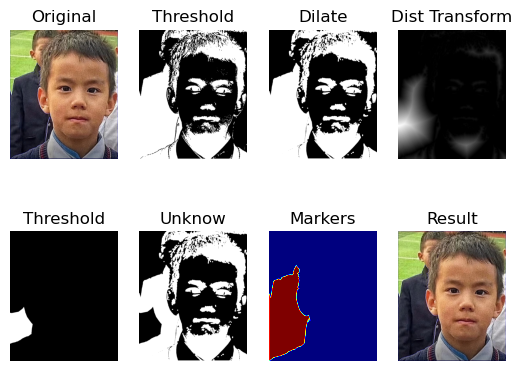

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as  plt
img = cv.imread('F:\\tuxiNG.jpg')
print(img.shape)# (393, 320, 3)
# 对图像颜色进行转换
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# 阈值分割，将图像分为黑白两部分
ret,thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# 去除图像中的任何白点噪声，使用形态学扩张，
kernel = np.ones((3,3),np.uint8)# 定义卷积核
# 对图像进行开运算：先腐蚀，再膨胀
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel,iterations=2)
# 注意：靠近对象中心的区域是前景目标，而离对象中心很远的区域是背景
# 确定背景区域:对开运算的结果进行膨胀，得到大部分都是背景的区域
sure_bg = cv.dilate(opening,kernel,iterations=2)# 膨胀操
# 距离变换，寻找前景区域：通过distanceTransform
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
print(dist_transform.max())# 30个像素点
# 获取边界
ret,sure_fg = cv.threshold(dist_transform,0.5*dist_transform.max(),255,0)
# 获得边界区域，找到未知区域
sure_fg = np.uint8(sure_fg)
unknow = cv.subtract(sure_bg,sure_fg)
# 类别标记,将具有相同像素值的像素标记为同一个连通组件,ret对连同区域进行标号
ret,markers = cv.connectedComponents(sure_fg)
print(markers.shape)# (393, 320)
# 将图像矩阵保存为文件
np.savetxt("image.txt", markers)
print(markers==1)
# 为所有的标记加1，保证背景是0而不是1
markers = markers+1
# 让所有的未知区域为0
markers[unknow==255] = 0
# 实施分水岭算法，标签图将会被修改，边界区域的标记将变为-1
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]
# 图片展示
plt.subplot(241), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),
plt.title('Original'), plt.axis('off')
plt.subplot(242), plt.imshow(thresh, cmap='gray'),
plt.title('Threshold'), plt.axis('off')
plt.subplot(243), plt.imshow(sure_bg, cmap='gray'),
plt.title('Dilate'), plt.axis('off')
plt.subplot(244), plt.imshow(dist_transform, cmap='gray'),
plt.title('Dist Transform'), plt.axis('off')
plt.subplot(245), plt.imshow(sure_fg, cmap='gray'),
plt.title('Threshold'), plt.axis('off')
plt.subplot(246), plt.imshow(unknow, cmap='gray'),
plt.title('Unknow'), plt.axis('off')
plt.subplot(247), plt.imshow(np.abs(markers), cmap='jet'),
plt.title('Markers'), plt.axis('off')
plt.subplot(248), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),
plt.title('Result'), plt.axis('off')
plt.show()